Defining imports etc.

In [38]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x, y  = sp.symbols('x y')
lambda_ = sp.symbols('lambda', real=True)


# Jacobian of the system

def jacobian(x1,y1):
    values = {x:x1, y:y1}
    jac = sp.Matrix([
        [-2*x*sp.sign(x - 1) - 2*sp.Abs(x - 1),
        -y*sp.sign(y - 1) - sp.Abs(y - 1)],
        [-x*sp.sign(x - 1) - sp.Abs(x - 1),
            -2*y*sp.sign(y - 1) - 2*sp.Abs(y - 1)]])
    jac = jac.subs(values)
    return jac


# Equilibrium points
    
x1 = 1/2 - sp.sqrt(9 + 12*lambda_)/6
x2 = 1/2 - sp.sqrt(9 - 12*lambda_)/6
x3 = 1/2 + sp.sqrt(9 - 12*lambda_)/6
x4 = 1/2 + sp.sqrt(9 + 12*lambda_)/6
y1 = 1/2 + sp.sqrt(9 + 12*lambda_)/6
y2 = 1/2 + sp.sqrt(9 - 12*lambda_)/6
y3 = 1/2 - sp.sqrt(9 + 12*lambda_)/6
y4 = 1/2 - sp.sqrt(9 - 12*lambda_)/6

Focusing on those that hit $2-x-y=0$ at $\lambda = 0$. This will correspond to all those which at $\lambda=0$ become 2-1-1 = 0. Thus they will have to be $\frac{1}{2} + ...$ for both $x$ and $y$. We choose x3y1.

In [39]:
lambdas = np.linspace(-0.75, 0.75, 100)

def get_stability(x,y):
    jac = jacobian(x,y)
    eigenvalues = jac.eigenvals()
    eigenvalues = [sp.re(i) for i in eigenvalues.keys()]
    if eigenvalues[0] < 0 and eigenvalues[1] < 0:
        return 'b' # stable
    elif eigenvalues[0] == 0 and eigenvalues[1] == 0:
        return 'g' # Saddle
    else:
        return 'r' # Unstable

# x3 = lambda l: 1/2 + sp.sqrt(9 - 12*l)/6
# y1 = lambda l: 1/2 - sp.sqrt(9 + 12*l)/6


# flow = [2-i-j for i,j in zip(x3(lambdas), y1(lambdas))]


Investigating those that hit $2-x-y=1$ at $\lambda=0$. $\Rightarrow$ requires that one point = 0 and one point = 1 and $\lambda=0$. Using x1y1

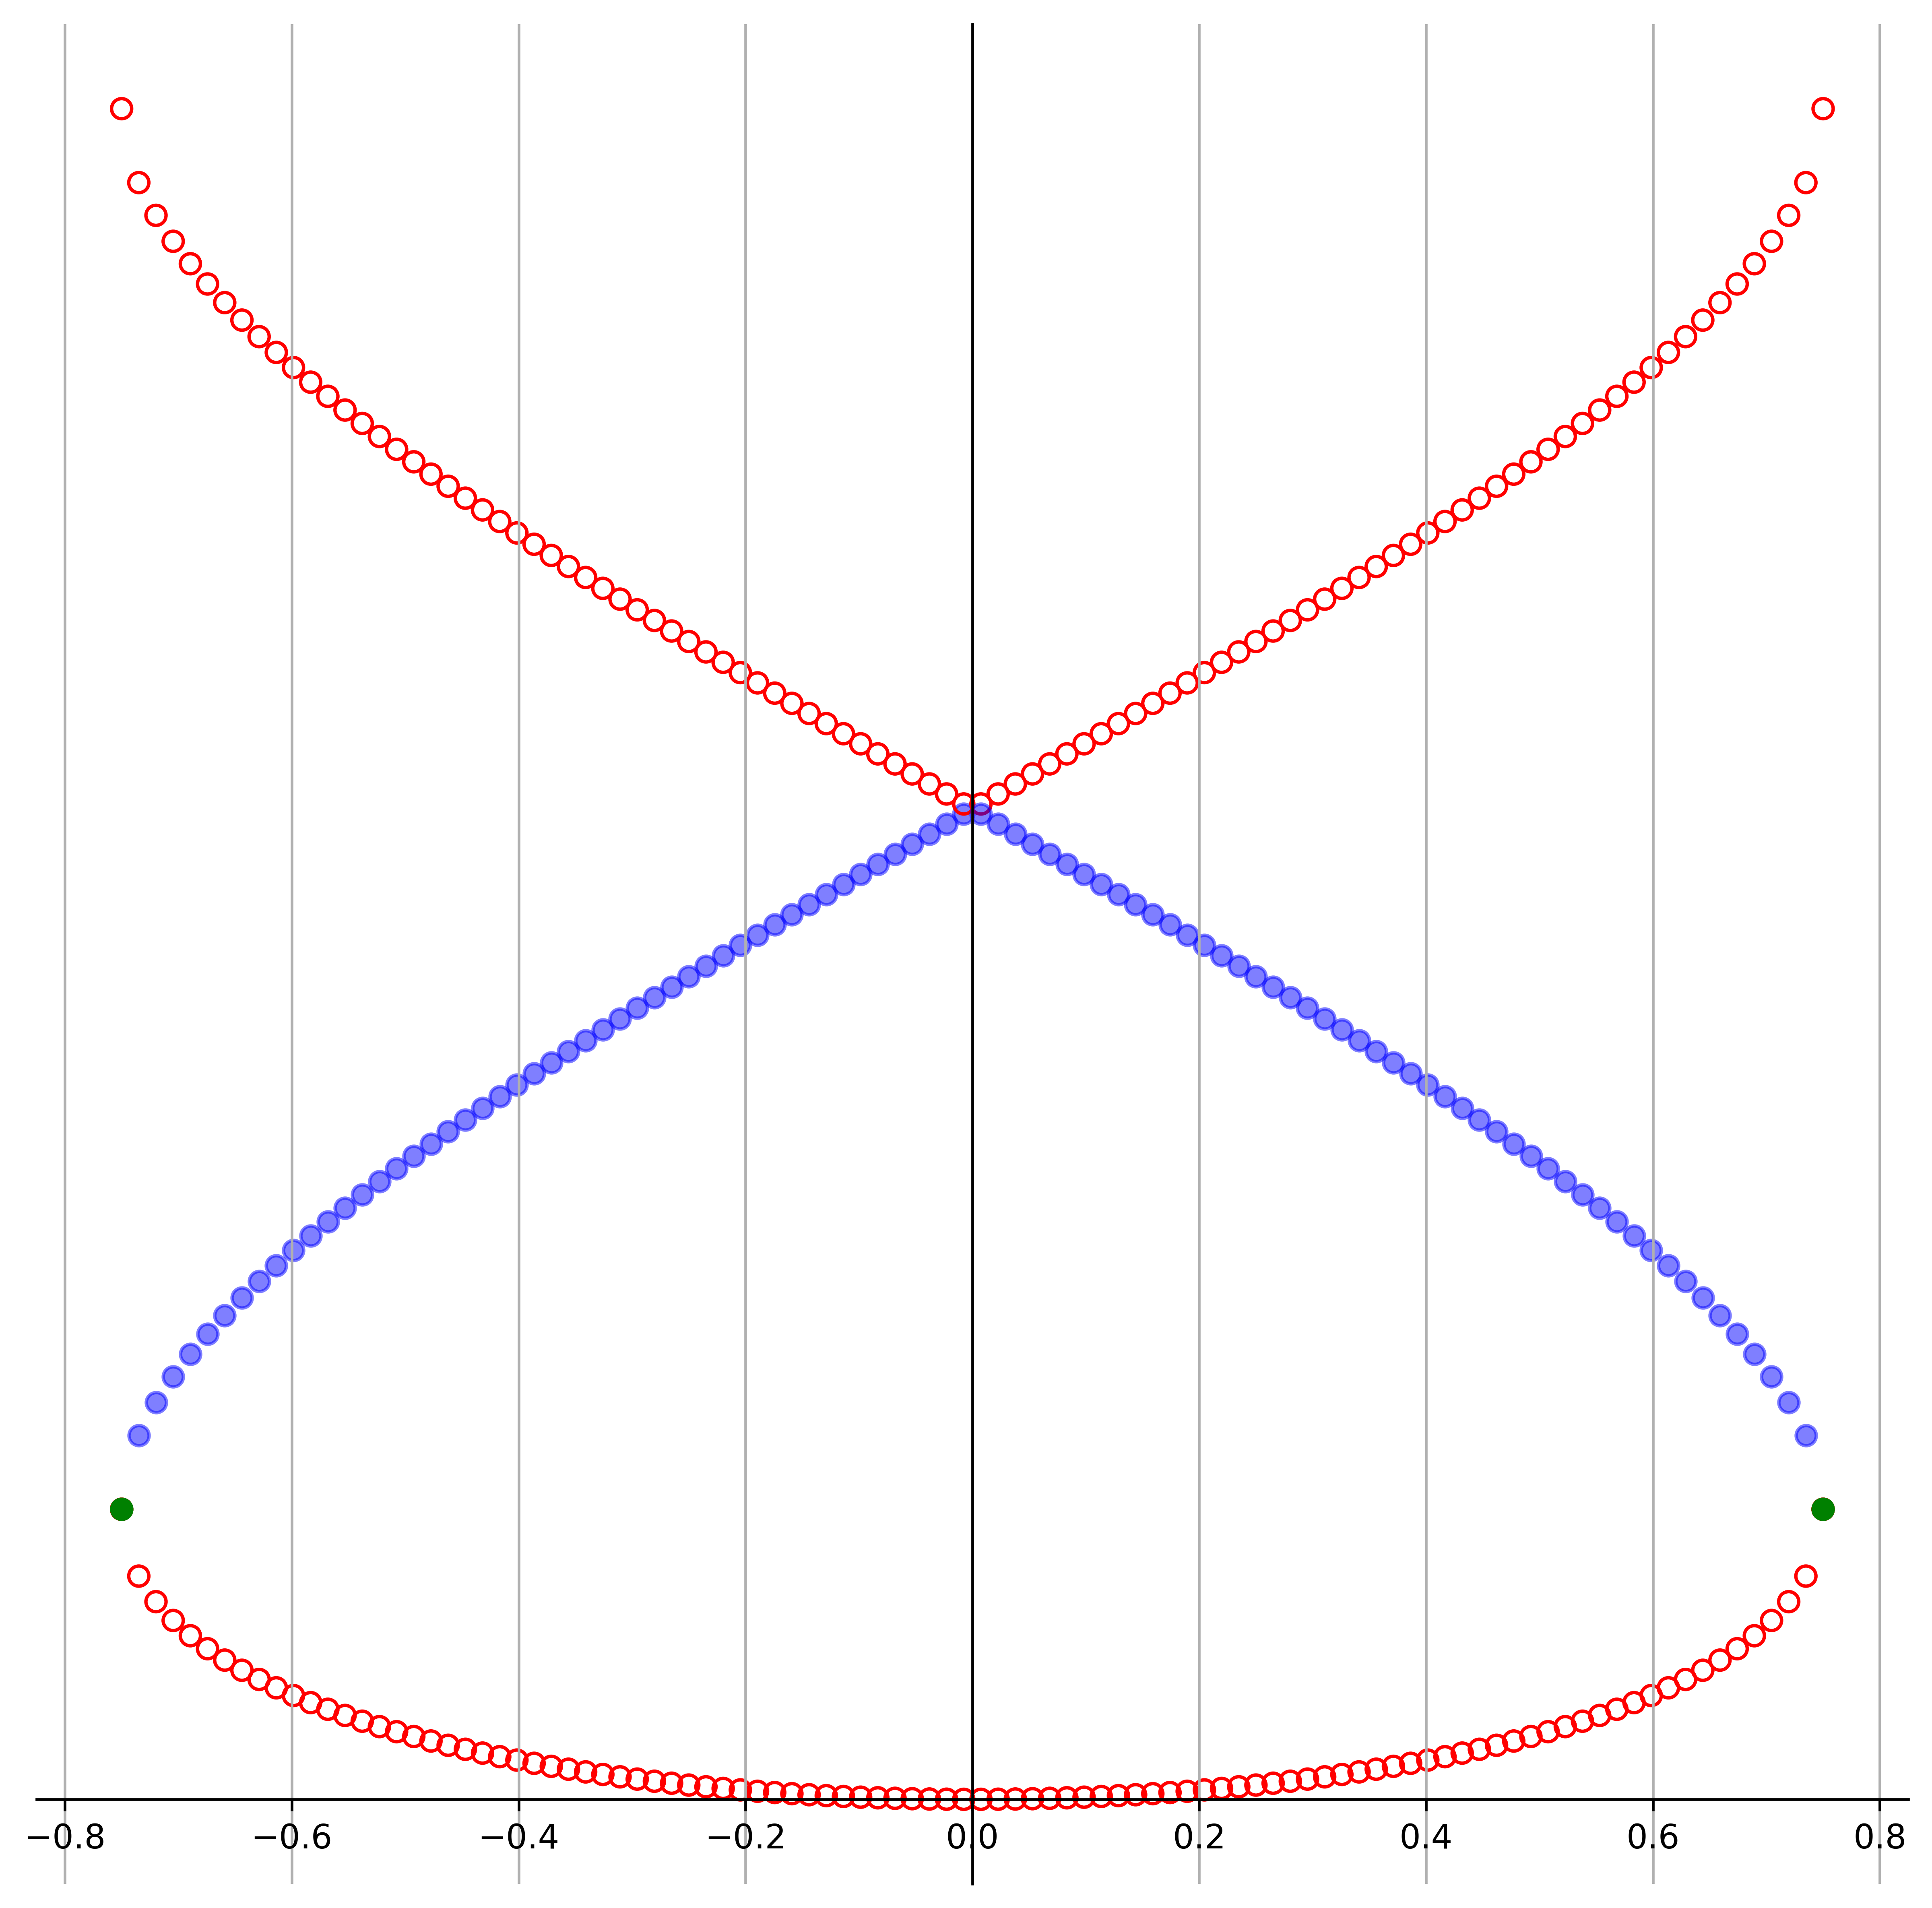

In [49]:

stabilities1 = [get_stability(x1.subs(lambda_, l), y2.subs(lambda_, l)) for l in lambdas]
stabilities2 = [get_stability(x2.subs(lambda_, l), y1.subs(lambda_, l)) for l in lambdas]
stabilities3 = [get_stability(x3.subs(lambda_, l), y1.subs(lambda_, l)) for l in lambdas]
points1 = [(x1.subs(lambda_, l), y2.subs(lambda_, l)) for l in lambdas]
points2 = [(x2.subs(lambda_, l), y1.subs(lambda_, l)) for l in lambdas]
points3 = [(x3.subs(lambda_, l), y1.subs(lambda_, l)) for l in lambdas]

fig, ax = plt.subplots(figsize=(10, 10))

for j,l in enumerate(lambdas):
    if stabilities1[j] == 'b':
        ax.scatter(l, 2-points1[j][0]-points1[j][1] , c='b', alpha=0.5)
    elif stabilities1[j] == 'r':
        ax.scatter(l, 2-points1[j][0]-points1[j][1],facecolors='none', edgecolors='r')
    elif stabilities1[j] == 'g':
        ax.scatter(l, 2-points1[j][0]-points1[j][1], c='g', alpha=1)
    
    if stabilities2[j] == 'b':
        ax.scatter(l, 2-points2[j][0]-points2[j][1] , c='b', alpha=0.5)
    elif stabilities2[j] == 'r':
        ax.scatter(l, 2-points2[j][0]-points2[j][1],facecolors='none', edgecolors='r')
    elif stabilities2[j] == 'g':
        ax.scatter(l, 2-points2[j][0]-points2[j][1], c='g', alpha=1)
    
    if stabilities3[j] == 'b':
        ax.scatter(l, 2-points3[j][0]-points3[j][1] , c='b', alpha=0.5)
    elif stabilities3[j] == 'r':
        ax.scatter(l, 2-points3[j][0]-points3[j][1], facecolors='none', edgecolors='r')
    elif stabilities3[j] == 'g':
        ax.scatter(l, 2-points3[j][0]-points3[j][1], c='g', alpha=1)



ax.scatter(-0.75, 2- x1.subs(lambda_,-0.75)- y2.subs(lambda_,-0.75), c='g', alpha=1)
ax.scatter(0.75, 2- x3.subs(lambda_,0.75)- y1.subs(lambda_,0.75), c='g', alpha=1)


plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['left'].set_position('zero')
plt.grid()


plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 600

plt.yticks([])

plt.show()
